In [5]:
import numpy as np
import pandas as pd
import time 

start_time = time.time()

def deferred_acceptance(proposing, accepting):
    acc = np.argsort(accepting, axis=1)
    prop = np.argsort(proposing, axis=1)
    
    offers = [[] for woman in range(len(acc))] # women-indexed offers
    matches = [-1 for woman in range(len(acc))] # women-indexed matches
    unmatched = [i for i in range(len(prop))] # list of men who are unmatched
    offered = [] # list of women who are offered men
    
    while unmatched:
        
        for man in unmatched:
            for idx, woman in reversed(list(enumerate(prop[man]))):
                if woman != -1:
                    offers[woman].append(man)
                    prop[man][idx] = -1
                    if woman not in offered:
                        offered.append(woman)
                    break
        
        unmatched = []
            
        for woman in offered:
            current_man = matches[woman]
            for man in reversed(acc[woman]):
                if man == current_man:
                    break
                if man in offers[woman]:
                    if current_man != -1:
                        unmatched.append(current_man)
                    matches[woman] = man
                    break
            for man in offers[woman]:
                best_man = matches[woman]
                if man != best_man and man != current_man:
                    unmatched.append(man)
                    
        offers = [[] for woman in range(len(acc))] # women-indexed offers
        offered = []
            
    return matches


def flip(matches, num_men):
    # Initialize an array of length 'num_men' with -1s
    B = [-1 for _ in range(num_men)]
    
    # Populate the array based on the matches
    for woman, man in enumerate(matches):
        if man != -1:
            B[man] = woman
            
    return B

    
def average_rank(matches, men_values):
    # Input: men-indexed matches
    # Output: average rank of woman with whom a man is matched
    
    total_rank = 0  # Sum of ranks of matched women
    num_matched_men = 0  # Number of men who are matched
    
    for man, woman in enumerate(matches):
        if woman != -1:  # Check if the man is matched
            num_matched_men += 1
            total_rank += men_values[man][woman]  # Add the rank of the matched woman for this man
            
    if num_matched_men == 0:  # Check to avoid division by zero
        return 0
    
    average_rank = total_rank / num_matched_men  # Calculate the average rank
    return average_rank

max_size = 500
avg_rank_men_proposing = np.zeros((max_size, max_size))
avg_rank_men_accepting = np.zeros((max_size, max_size))
num_loops = 20

for men in range(10, max_size, 10):
    for women in range(10, max_size,10):
        if men > women:
            continue
        print(f"{men} men, {women} women")
        for loop in range(num_loops):
                        
            men_values = np.array([np.random.permutation(range(0, women)) for _ in range(men)])
            women_values = np.array([np.random.permutation(range(0, men)) for _ in range(women)])

#             print("\n Men's Preferences:")
#             print(men_values)
#             print("Women's Preferences:")
#             print(women_values)
            
            # MPDA
            matches_men_proposing = deferred_acceptance(men_values, women_values)
            men_indexed_matches = flip(matches_men_proposing, men)
            avg_rank_MPDA = average_rank(men_indexed_matches, men_values)
            avg_rank_men_proposing[men][women] += (women - avg_rank_MPDA)
            
            # WPDA
            matches_men_accepting = deferred_acceptance(women_values, men_values)
            avg_rank_WPDA = average_rank(matches_men_accepting, men_values)
            avg_rank_men_accepting[men][women] += (women - avg_rank_WPDA)
            
#             print(f"\n MPDA:")
#             print(f"Stable Matchings: {men_indexed_matches}")
#             print(f"Men Average Rank: {women - avg_rank_MPDA} \n")

#             print(f"\n WPDA:")
#             print(f"Stable Matchings: {matches_men_accepting}")
#             print(f"Men Average Rank: {women - avg_rank_WPDA} \n")
#             print("---------- \n")

        
        avg_rank_men_proposing[men][women] /= num_loops
        avg_rank_men_accepting[men][women] /= num_loops

# Export to CSV

print(pd.DataFrame(avg_rank_men_proposing))
print(pd.DataFrame(avg_rank_men_accepting))
pd.DataFrame(avg_rank_men_proposing).to_csv("avg_rank_men_proposing.csv", index=False)
pd.DataFrame(avg_rank_men_accepting).to_csv("avg_rank_men_accepting.csv", index=False)


end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for deferred_acceptance with max size {max_size} and {num_loops} loops: {elapsed_time} seconds")


10 men, 10 women
10 men, 20 women
10 men, 30 women
10 men, 40 women
10 men, 50 women
10 men, 60 women
10 men, 70 women
10 men, 80 women
10 men, 90 women
10 men, 100 women
10 men, 110 women
10 men, 120 women
10 men, 130 women
10 men, 140 women
10 men, 150 women
10 men, 160 women
10 men, 170 women
10 men, 180 women
10 men, 190 women
10 men, 200 women
10 men, 210 women
10 men, 220 women
10 men, 230 women
10 men, 240 women
10 men, 250 women
10 men, 260 women
10 men, 270 women
10 men, 280 women
10 men, 290 women
10 men, 300 women
10 men, 310 women
10 men, 320 women
10 men, 330 women
10 men, 340 women
10 men, 350 women
10 men, 360 women
10 men, 370 women
10 men, 380 women
10 men, 390 women
10 men, 400 women
10 men, 410 women
10 men, 420 women
10 men, 430 women
10 men, 440 women
10 men, 450 women
10 men, 460 women
10 men, 470 women
10 men, 480 women
10 men, 490 women
20 men, 20 women
20 men, 30 women
20 men, 40 women
20 men, 50 women
20 men, 60 women
20 men, 70 women
20 men, 80 women
20 men, 

110 men, 210 women
110 men, 220 women
110 men, 230 women
110 men, 240 women
110 men, 250 women
110 men, 260 women
110 men, 270 women
110 men, 280 women
110 men, 290 women
110 men, 300 women
110 men, 310 women
110 men, 320 women
110 men, 330 women
110 men, 340 women
110 men, 350 women
110 men, 360 women
110 men, 370 women
110 men, 380 women
110 men, 390 women
110 men, 400 women
110 men, 410 women
110 men, 420 women
110 men, 430 women
110 men, 440 women
110 men, 450 women
110 men, 460 women
110 men, 470 women
110 men, 480 women
110 men, 490 women
120 men, 120 women
120 men, 130 women
120 men, 140 women
120 men, 150 women
120 men, 160 women
120 men, 170 women
120 men, 180 women
120 men, 190 women
120 men, 200 women
120 men, 210 women
120 men, 220 women
120 men, 230 women
120 men, 240 women
120 men, 250 women
120 men, 260 women
120 men, 270 women
120 men, 280 women
120 men, 290 women
120 men, 300 women
120 men, 310 women
120 men, 320 women
120 men, 330 women
120 men, 340 women
120 men, 350

240 men, 370 women
240 men, 380 women
240 men, 390 women
240 men, 400 women
240 men, 410 women
240 men, 420 women
240 men, 430 women
240 men, 440 women
240 men, 450 women
240 men, 460 women
240 men, 470 women
240 men, 480 women
240 men, 490 women
250 men, 250 women
250 men, 260 women
250 men, 270 women
250 men, 280 women
250 men, 290 women
250 men, 300 women
250 men, 310 women
250 men, 320 women
250 men, 330 women
250 men, 340 women
250 men, 350 women
250 men, 360 women
250 men, 370 women
250 men, 380 women
250 men, 390 women
250 men, 400 women
250 men, 410 women
250 men, 420 women
250 men, 430 women
250 men, 440 women
250 men, 450 women
250 men, 460 women
250 men, 470 women
250 men, 480 women
250 men, 490 women
260 men, 260 women
260 men, 270 women
260 men, 280 women
260 men, 290 women
260 men, 300 women
260 men, 310 women
260 men, 320 women
260 men, 330 women
260 men, 340 women
260 men, 350 women
260 men, 360 women
260 men, 370 women
260 men, 380 women
260 men, 390 women
260 men, 400

Time taken for deferred_acceptance with max size 500 and 20 loops: 14198.03262591362 seconds


In [12]:
additional_women_needed = np.zeros((max_size, max_size))

for men in range(10, max_size, 10):
    for women in range(10, max_size, 10):
        # Set to NaN for small market sizes (2 agents or fewer on either side)
        if men <= 2  or women <= 2:
            additional_women_needed[men][women] = np.nan
        # Only consider cells where men < women
        elif men < women:
            added_women = 0
            while True:
                # Check if index out of bounds
                if women + added_women >= avg_rank_men_accepting.shape[1]:
                    added_women = -1  # Indicate that it's not possible
                    break
                # Check the condition
                if avg_rank_men_accepting[men][women + added_women] <= avg_rank_men_proposing[men][women]:
                    break
                added_women += 1
            # Update the additional_women_needed matrix
            additional_women_needed[men][women] = added_women
        else:
            # Set to NaN for cells where men >= women
            additional_women_needed[men][women] = np.nan

# Save to CSV
pd.DataFrame(additional_women_needed).to_csv("additional_women_needed.csv", index=False)


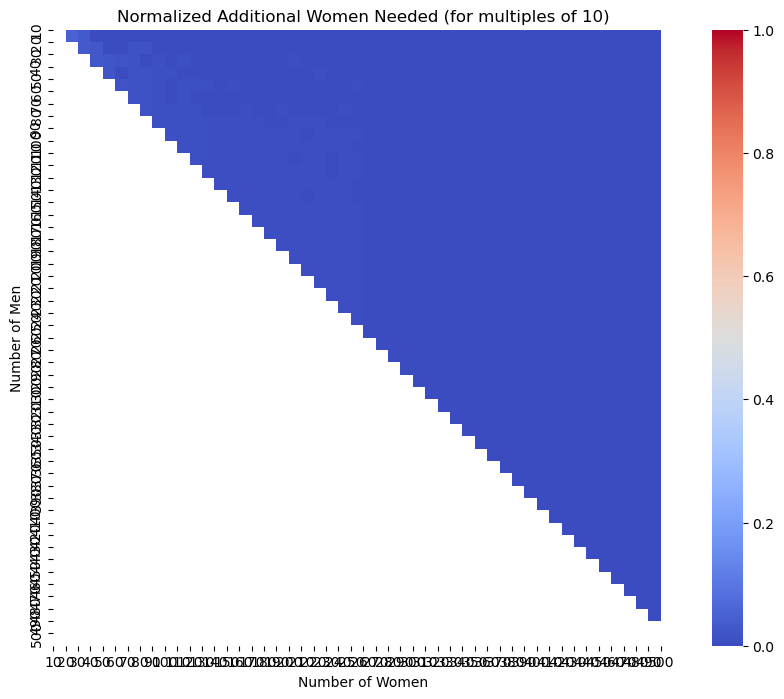

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load data
additional_women_needed = pd.read_csv("additional_women_needed.csv").values

# We'll create a submatrix that only includes the multiples of 10
submatrix_shape = (additional_women_needed.shape[0] // 10, additional_women_needed.shape[1] // 10)
submatrix = np.full(submatrix_shape, np.nan)  # Initialize with NaN

# Populate the submatrix with values for multiples of 10
for men_idx, men in enumerate(range(10, additional_women_needed.shape[0], 10)):
    for women_idx, women in enumerate(range(10, additional_women_needed.shape[1], 10)):
        submatrix[men_idx, women_idx] = additional_women_needed[men][women] / women if additional_women_needed[men][women] != -1 else np.nan

# Create a heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(submatrix, cmap="coolwarm", annot=False, fmt=".2f", vmin=0, vmax=1)

# Adjust the axes to show labels for every 10 agents
xtick_labels = list(range(10, additional_women_needed.shape[1]+1, 10))
ytick_labels = list(range(10, additional_women_needed.shape[0]+1, 10))
ax.set_xticks(np.arange(len(xtick_labels)))
ax.set_yticks(np.arange(len(ytick_labels)))
ax.set_xticklabels(xtick_labels)
ax.set_yticklabels(ytick_labels)

plt.title("Normalized Additional Women Needed (for multiples of 10)")
plt.xlabel("Number of Women")
plt.ylabel("Number of Men")
plt.show()


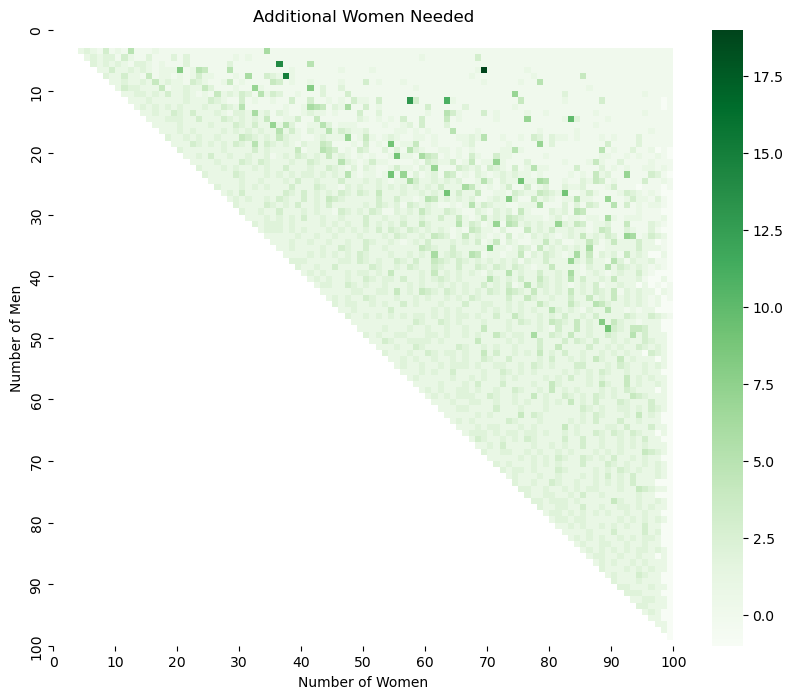

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load data
additional_women_needed = pd.read_csv("additional_women_needed.csv").values

# Create a new matrix for normalized values
normalized_matrix = np.full(additional_women_needed.shape, np.nan)  # Initialize with NaN

# Normalize the values
for men in range(additional_women_needed.shape[0]):
    for women in range(additional_women_needed.shape[1]):
        # Ensure we're above the diagonal (men < women)
        if men < women:
            if additional_women_needed[men][women] == -1:
                normalized_matrix[men][women] = -1  # leave as -1 if it's -1
            else:
                normalized_matrix[men][women] = additional_women_needed[men][women] / women

# Set -1 values to NaN for visualization
normalized_matrix[normalized_matrix == -1] = np.nan

# Create a heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(additional_women_needed, cmap="Greens", annot=False, fmt=".2f")

# Adjust the axes to show every 10 agents
ax.set_xticks(np.arange(0, normalized_matrix.shape[1] + 1, 10))
ax.set_yticks(np.arange(0, normalized_matrix.shape[0] + 1, 10))
ax.set_xticklabels(np.arange(0, normalized_matrix.shape[1] + 1, 10))
ax.set_yticklabels(np.arange(0, normalized_matrix.shape[0] + 1, 10))

plt.title("Additional Women Needed")
plt.xlabel("Number of Women")
plt.ylabel("Number of Men")
plt.show()


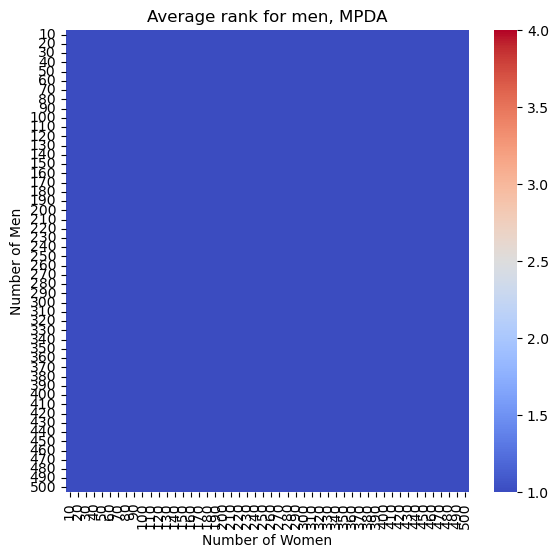

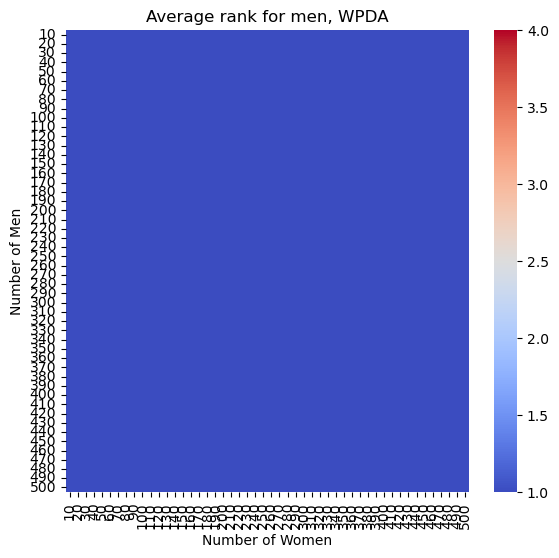

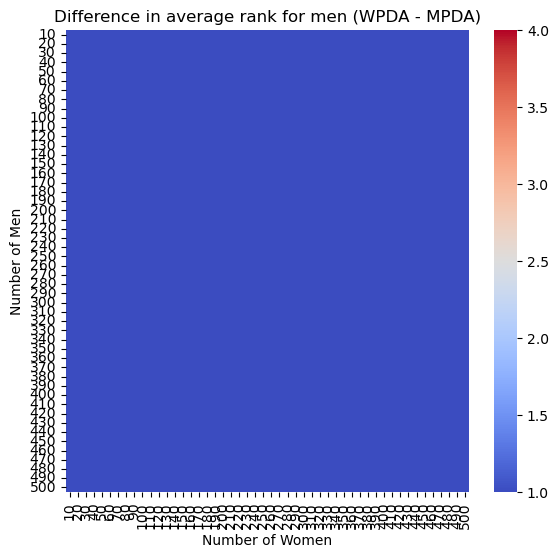

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
men_proposing = pd.read_csv('avg_rank_men_proposing.csv', index_col=0)
men_accepting = pd.read_csv('avg_rank_men_accepting.csv', index_col=0)

# Filter out rows and columns where the number of men or women is 2 or less
men_proposing = men_proposing.iloc[3:, 3:]
men_accepting = men_accepting.iloc[3:, 3:]

# Reset index and columns to start from 3
men_proposing.index = range(3, len(men_proposing) + 3)
men_proposing.columns = range(3, len(men_proposing.columns) + 3)
men_accepting.index = range(3, len(men_accepting) + 3)
men_accepting.columns = range(3, len(men_accepting.columns) + 3)

# Create a mask to only show values above the diagonal (including the diagonal)
mask = np.tril(np.ones_like(men_proposing, dtype=bool), k=1)

# Create a list for tick marks at every 10th position
ticks = list(range(0, len(men_proposing) + 3, 100))
ticklabels = [str(i) for i in ticks]

# Function to adjust tick locations and labels
def adjust_ticks(axis):
    axis.set_xticks([i-2.5 for i in ticks])  # Adjusting tick positions
    axis.set_yticks([i-2.5 for i in ticks])  # Adjusting tick positions
    axis.set_xticklabels(ticklabels)
    axis.set_yticklabels(ticklabels)

# Plotting heatmap for men proposing
plt.figure(figsize=(6.5, 6))
sns.heatmap(men_proposing, cmap='coolwarm', mask=mask, vmin=1, vmax=4)
plt.title('Average rank for men, MPDA')
plt.xlabel("Number of Women")
plt.ylabel("Number of Men")
adjust_ticks(plt.gca())
plt.show()

# Plotting heatmap for men accepting
plt.figure(figsize=(6.5, 6))
sns.heatmap(men_accepting, cmap='coolwarm', mask=mask, vmin=1, vmax=4)
plt.title('Average rank for men, WPDA')
adjust_ticks(plt.gca())
plt.xlabel("Number of Women")
plt.ylabel("Number of Men")
plt.show()

# Computing the difference and plotting heatmap for the difference
difference = men_accepting - men_proposing
plt.figure(figsize=(6.5, 6))
sns.heatmap(difference, cmap='Greens', mask=mask)
plt.title('Difference in average rank for men (WPDA - MPDA)')
plt.xlabel("Number of Women")
plt.ylabel("Number of Men")
adjust_ticks(plt.gca())
plt.show()
